In [2]:
#importando librerias que se piensan utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
propiedades = pd.read_csv("propiedades_limpio.csv", decimal=".")

In [10]:
list(propiedades['currency'].unique())

['USD']

In [11]:
df_final2=propiedades[['currency','price_per_m2','surface_total_in_m2']]
aux=propiedades.iloc[0:,14:]
df_final3 =pd.concat([df_final2,aux], axis='columns')
df_final3.isnull().sum()

currency                       0
price_per_m2                   0
surface_total_in_m2            0
Barrio_agronomía               0
Barrio_almagro                 0
Barrio_balvanera               0
Barrio_barracas                0
Barrio_barrio norte            0
Barrio_belgrano                0
Barrio_boca                    0
Barrio_boedo                   0
Barrio_caballito               0
Barrio_catalinas               0
Barrio_centro / microcentro    0
Barrio_chacarita               0
Barrio_coghlan                 0
Barrio_colegiales              0
Barrio_congreso                0
Barrio_constitución            0
Barrio_flores                  0
Barrio_floresta                0
Barrio_las cañitas             0
Barrio_liniers                 0
Barrio_mataderos               0
Barrio_monserrat               0
Barrio_monte castro            0
Barrio_nuñez                   0
Barrio_once                    0
Barrio_palermo                 0
Barrio_palermo chico           0
          

In [12]:
 #Guardamos el final
df_final3.to_dense().to_csv("propiedades_limpio2.csv", index = False, sep=',', encoding='utf-8')

In [13]:
df_final3.head(10)

,currency,price_per_m2,surface_total_in_m2,Barrio_agronomía,Barrio_almagro,Barrio_balvanera,Barrio_barracas,Barrio_barrio norte,Barrio_belgrano,Barrio_boca,...,Amb,pileta,amenities,cochera,pozo_en_descrip,pozo_en_title,a_estrenar,expensas,baulera,apto_credito
0,USD,3723.333333,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,1,0,1,1,0,1,0,0
1,USD,4770.967742,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,1,0,1,1,0,1,0,0
2,USD,2438.775510,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0,0,0,0,0,0,0,0,0
3,USD,3645.833333,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0,0,0,0,0,0,0,1,0
4,USD,3705.479452,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0,0,0,0,0,0,0,0,0
5,USD,1744.186047,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0,0,0,0,0,0,0,0,0
6,USD,1883.116883,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0,0,0,0,0,0,1,0,0
7,USD,3692.307692,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1,1,1,0,0,0,0,1,0
8,USD,1935.483871,141.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,0,0,1,0,0,0,0,1,0
9,USD,2200.000000,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0,1,0,0,0,1,1,1,0


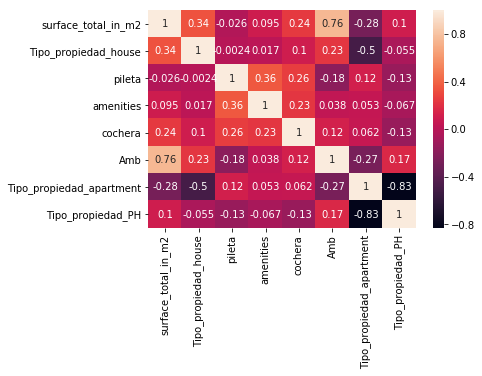

In [14]:
sns.heatmap(df_final3[['surface_total_in_m2','Tipo_propiedad_house', 'pileta', 'amenities', 'cochera', 'Amb','Tipo_propiedad_apartment','Tipo_propiedad_PH']].corr(), annot=True)
plt.show()

In [345]:
#DataFrame con distintos campos para probar
df_final4 = df_final3

#Elimino algunos outliers

df_final4.drop(df_final4[(df_final4.Amb == 1) & (df_final4.surface_total_in_m2 > 110)].index, inplace = True)
df_final4.drop(df_final4[(df_final4.Amb == 2) & (df_final4.surface_total_in_m2 > 150)].index, inplace = True)
df_final4.drop(df_final4[(df_final4.Amb == 3) & (df_final4.surface_total_in_m2 > 240)].index, inplace = True)
df_final4.drop(df_final4[(df_final4.Amb == 4) & (df_final4.surface_total_in_m2 > 400)].index, inplace = True)
df_final4.drop(df_final4[(df_final4.Amb == 5) & (df_final4.surface_total_in_m2 < 50)].index, inplace = True)
df_final4.drop(df_final4[(df_final4.Amb == 6) & (df_final4.surface_total_in_m2 > 450)].index, inplace = True)
df_final4.drop(df_final4[(df_final4.Amb == 6) & (df_final4.surface_total_in_m2 < 80)].index, inplace = True)
df_final4.drop(df_final4[(df_final4.Amb == 7) & (df_final4.surface_total_in_m2 > 360)].index, inplace = True)
df_final4.drop(df_final4[(df_final4.Amb == 7) & (df_final4.surface_total_in_m2 < 130)].index, inplace = True)


df_All = df_final4.drop(['currency','price_per_m2'], axis=1)

#df_All[(df_All['Amb'] == 2)].plot(kind='scatter', x='surface_total_in_m2', y='Amb', alpha=0.2)
#df_All.plot(kind='scatter', x='surface_total_in_m2', y='Amb', alpha=0.2)


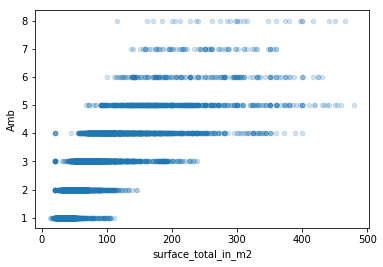

In [346]:
#XDefinimos las variables categoricas simples para probar un modelo
X = df_final4[['surface_total_in_m2', 'Amb','pileta', 'amenities','cochera']]
y = df_final4['price_per_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# Ploteamos puntos con Pandas
X_train.plot(kind='scatter', x='surface_total_in_m2', y='Amb', alpha=0.2);



In [347]:
#Reseteo los indices para poder hacer el concat con los datos escalados
X_train.index = pd.RangeIndex(len(X_train.index))

In [348]:
#Normalizacion
from sklearn import preprocessing
#Creo una variable con las columas que quiero escalar
lista_numericos = ['surface_total_in_m2', 'Amb']

#Instancio el metodo para escalar
scaler = StandardScaler()

#Fiteo el modelo con los datos de training
X_train_numerico = scaler.fit_transform(X_train[lista_numericos])


In [349]:
#Transformo el array con los valores escalado en un DF y luego renombro las columnas
df_t = pd.DataFrame(X_train_numerico)
df_t.columns = ['surface_total_in_m2_scl', 'Amb_scl']
df_t.head()

,surface_total_in_m2_scl,Amb_scl
0,-0.753144,-1.275226
1,0.837841,1.599756
2,-0.437949,-0.556481
3,1.243092,0.881010
4,-0.798172,-0.556481


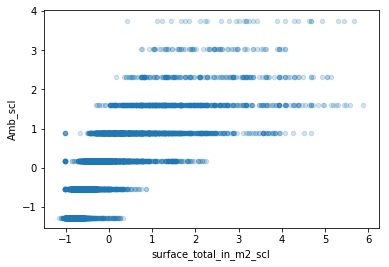

In [350]:
#Creo un nuevo DF con los datos de X_train y agrego las columnas escaladas
X_train_scaled = pd.concat([df_t,X_train], axis=1)

#Luego borro las columnas originales que fueron escaladas
X_train_scaled.drop('surface_total_in_m2', axis=1, inplace=True)
X_train_scaled.drop('Amb', axis=1, inplace=True)

# Ploteamos puntos con Pandas
X_train_scaled.plot(kind='scatter', x='surface_total_in_m2_scl', y='Amb_scl', alpha=0.2);

In [351]:
lm = linear_model.LinearRegression()

#model_1 = lm.fit(X_train, y_train)
model_1 = lm.fit(X_train_scaled, y_train)

#print('Score model_1:', model_1.score(X_test, y_test))


In [352]:
#Reseteo indice de X_test antes de concatenar las columnas escaladas
X_test.index = pd.RangeIndex(len(X_test.index))

#En X_test_numerico guardo los dats escalado
X_test_numerico = scaler.transform(X_test[lista_numericos])

df_tst_t = pd.DataFrame(X_test_numerico)
df_tst_t.columns = ['surface_total_in_m2_scl', 'Amb_scl']

#X_test_escaled tiene el DF orininal de test mas las dos variables escaladas
X_test_scaled = pd.concat([df_tst_t,X_test], axis=1)

#Elimino las variables originales que escale
X_test_scaled.drop('surface_total_in_m2', axis=1, inplace=True)
X_test_scaled.drop('Amb', axis=1, inplace=True)

In [353]:
print('Score model_1:', model_1.score(X_test_scaled, y_test))


Score model_1: 0.19072160265360505


In [354]:
# Entrenamos otro modelo con mas variables 

X_some = df_final3[['surface_total_in_m2', 'pileta', 'amenities','cochera','Amb','Tipo_propiedad_apartment','Tipo_propiedad_house','Tipo_propiedad_PH']]


X_some_train, X_some_test, y_some_train, y_some_test = train_test_split(X_some, y, test_size=0.35, random_state=10)


model_2 = lm.fit(X_some_train, y_some_train)
print('Score model_2:', model_2.score(X_some_test, y_some_test))

Score model_2: 0.22466122516483167


In [344]:
df_All.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12157 entries, 0 to 12250
Data columns (total 75 columns):
surface_total_in_m2            12157 non-null float64
Barrio_agronomía               12157 non-null float64
Barrio_almagro                 12157 non-null float64
Barrio_balvanera               12157 non-null float64
Barrio_barracas                12157 non-null float64
Barrio_barrio norte            12157 non-null float64
Barrio_belgrano                12157 non-null float64
Barrio_boca                    12157 non-null float64
Barrio_boedo                   12157 non-null float64
Barrio_caballito               12157 non-null float64
Barrio_catalinas               12157 non-null float64
Barrio_centro / microcentro    12157 non-null float64
Barrio_chacarita               12157 non-null float64
Barrio_coghlan                 12157 non-null float64
Barrio_colegiales              12157 non-null float64
Barrio_congreso                12157 non-null float64
Barrio_constitución        

In [355]:
# Entrenamos otro modelo con todas las variables

X_all = df_All

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size=0.4, random_state=10)
X_all_train.index = pd.RangeIndex(len(X_all_train.index))

In [356]:
#Normalizacion
#from sklearn import preprocessing
#Creo una variable con las columas que quiero escalar
#lista_numericos = ['surface_total_in_m2', 'Amb']

#Instancio el metodo para escalar
scaler_all = StandardScaler()

#Fiteo el modelo con los datos de training
X_all_train_numerico = scaler_all.fit_transform(X_all_train[lista_numericos])

#Transformo el array con los valores escalado en un DF y luego renombro las columnas
df_all_t = pd.DataFrame(X_all_train_numerico)
df_all_t.columns = ['surface_total_in_m2_scl', 'Amb_scl']

#Creo un nuevo DF con los datos de X_train y agrego las columnas escaladas
X_all_train_scaled = pd.concat([df_all_t,X_all_train], axis=1)

#Luego borro las columnas originales que fueron escaladas
X_all_train_scaled.drop('surface_total_in_m2', axis=1, inplace=True)
X_all_train_scaled.drop('Amb', axis=1, inplace=True)


In [357]:
model_3 = lm.fit(X_all_train_scaled, y_all_train)

In [358]:
#Reseteo indice de X_test antes de concatenar las columnas escaladas
X_all_test.index = pd.RangeIndex(len(X_all_test.index))

#En X_test_numerico guardo los dats escalado
X_all_test_numerico = scaler_all.transform(X_all_test[lista_numericos])

df_all_t = pd.DataFrame(X_all_test_numerico)
df_all_t.columns = ['surface_total_in_m2_scl', 'Amb_scl']

#X_test_escaled tiene el DF orininal de test mas las dos variables escaladas
X_all_test_scaled = pd.concat([df_all_t,X_all_test], axis=1)

#Elimino las variables originales que escale
X_all_test_scaled.drop('surface_total_in_m2', axis=1, inplace=True)
X_all_test_scaled.drop('Amb', axis=1, inplace=True)

In [359]:
print('Score model_3:', model_3.score(X_all_test_scaled, y_all_test))

Score model_3: -641297.8973788033


In [20]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.001, 0.3, 300)
al_lasso = np.linspace(0.1, 0.5, 300)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)

In [21]:
# Instanciamos los modelos Ridge y Lasso

lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)

In [ ]:
# Entrenamos los modemos

lm_ridge_cv.fit(X_all_train, y_all_train)
lm_lasso_cv.fit(X_all_train, y_all_train)


In [24]:
print("Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_all_train, y_all_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_all_train, y_all_train))

Score Train Ridge : 0.21
 Score Train Lasso : 0.21

